In [76]:
from matplotlib import pyplot as plt

In [77]:
import numpy as np
import pandas as pd

In [78]:
df=pd.read_csv('Nutrient Composition Dataset.csv')

In [79]:
df.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"


In [80]:
df.iloc[:,1:5].describe()

,Protein,Fat,vitaminC,Fibre
count,1746.000000,1746.000000,1746.000000,1746.000000
mean,0.922470,0.900091,0.900146,0.900830
std,0.627128,0.634617,0.623847,0.626875
min,0.000128,0.000267,0.000029,0.002579
25%,0.435853,0.394784,0.419103,0.389124
50%,0.813025,0.804687,0.796290,0.820783
75%,1.295106,1.298988,1.280870,1.295732
max,4.016890,3.979364,4.013322,3.570331


In [81]:
data=df.iloc[:,1:5]

In [82]:
data.head()

,Protein,Fat,vitaminC,Fibre
0,0.452369,1.170926,1.079271,1.702960
1,2.321087,0.706856,0.350088,0.658249
2,0.884554,1.186571,2.428544,1.984562
3,0.715501,0.577599,0.270925,0.369266
4,0.132610,0.544521,0.116884,0.557309


In [83]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [84]:
wardlink=linkage(data,method='ward')

In [85]:
wardlink

array([[3.12000000e+02, 1.06100000e+03, 2.41103755e-02, 2.00000000e+00],
       [6.72000000e+02, 1.06600000e+03, 3.50400283e-02, 2.00000000e+00],
       [1.77000000e+02, 1.54900000e+03, 4.09211042e-02, 2.00000000e+00],
       ...,
       [3.48400000e+03, 3.48600000e+03, 1.96940113e+01, 1.04000000e+03],
       [3.48200000e+03, 3.48700000e+03, 2.76332047e+01, 7.06000000e+02],
       [3.48800000e+03, 3.48900000e+03, 3.30525698e+01, 1.74600000e+03]])

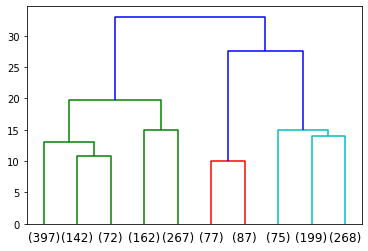

In [94]:
dend=dendrogram (wardlink,truncate_mode='lastp',p=10)


In [95]:

from scipy.cluster.hierarchy import fcluster

In [100]:
### Method 1

clusters=fcluster(wardlink, 3, criterion="maxclust")
clusters


array([1, 1, 2, ..., 1, 1, 3], dtype=int32)

In [105]:
### method 2 

clusters=fcluster(wardlink,22, criterion="distance")
clusters

array([1, 1, 2, ..., 1, 1, 3], dtype=int32)

In [106]:
df['clusters']=clusters

In [107]:
df.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product,clusters
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with...",1
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks,1
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include...",2
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT",1
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned",1
